In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

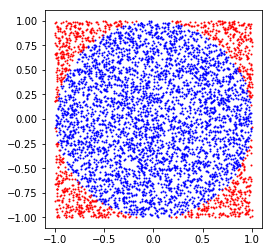

In [10]:
def est_pi(size):
    pts = np.random.uniform(-1,1,size=(size, 2))
    inside = pts[:,0]**2 + pts[:,1]**2 < 1
    pi = round(float(sum(inside)) / size * 4, 3)     
    return pi, pts, inside

_, pts, inside = est_pi(5000)

# ratio of blue points to total points is pi/4
plt.scatter(pts[inside][:,0], pts[inside][:,1], color='blue', s=1)
plt.scatter(pts[~inside][:,0], pts[~inside][:,1], color='red', s=1)

# set reasonable margis and ensure properly scaled aspect ratio
plt.margins(.05)
plt.gca().set_aspect('equal')

plt.show()

<h1>Geometry:</h1>
<ul>
    <li>Area of cirlce is $\pi*r^2 = \pi$</li>
    <li>Area of square is $(2*r) * (2*r) = 4$</li>
    <li>The chance of point falling inside the shape $\propto$ to area of shape.</li>
    <ul style="list-style: none;">
        <li>$\pi \approx \frac{\text{# pts in circle}}{\text{# pts in square}} * 4$</li>
    </ul>
</ul>

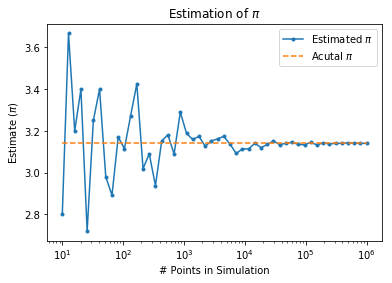

In [12]:
# setup sim
sizes = np.logspace(1,6,50)
x = []
y = []
for size in sizes:
    pi = est_pi(int(size))[0]
    x.append(size)
    y.append(pi)
    error.append(np.abs(np.pi - pi)/np.pi)

# setup plot
plt.plot(x,y, linestyle='solid', marker='.', label='Estimated $\pi$')
pi = np.ones_like(x)*np.pi

# style and show the plot
plt.plot(x, pi, linestyle='dashed', label='Acutal $\pi$')
plt.xscale('log')
plt.legend()
plt.xlabel('# Points in Simulation')
plt.ylabel('Estimate ($\pi$)')
plt.title('Estimation of $\pi$')

plt.show()

<h1>Other resources:</h1>
<ul>
    <li>https://www.exploratorium.edu/snacks/pi-toss</li>
    <li>https://pythonprogramming.net/monte-carlo-simulator-python/</li>
</ul>